# Lesson 2: First look at data

In this lesson we will look at a toy dataset simulating $J/\psi \rightarrow \mu^+ \mu^-$ events. We will discuss ways of loading the data in python, data formats and plotting with ```matplotlib```.

### Recap: Importing modules

It's generally seen as good practice to put imports at the top of your file:

In [1]:
from matplotlib import pyplot as plt
import uproot
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold

## 5. The toy dataset

We're going to look at some fake $J/\psi \rightarrow \mu^+ \mu^-$ data, the variables available are:

- `Jpsi_M` `Jpsi_P` `Jpsi_PT` `Jpsi_PE` `Jpsi_PX` `Jpsi_PY` `Jpsi_PZ`
- `mum_M` `mum_PT` `mum_eta` `mum_PE` `mum_PX` `mum_PY` `mum_PZ` `mum_IP` `mum_ProbNNmu` `mum_ProbNNpi`
- `mup_M` `mup_PT` `mup_eta` `mup_PE` `mup_PX` `mup_PY` `mup_PZ` `mup_IP` `mup_ProbNNmu` `mup_ProbNNpi`
- `nTracks`

The meanings of the suffixes are as follows:

- `_M`: Invarient mass of the particle (fixed to the PDG value for muons)
- `_P`: Absolute value of the particle's three momentum
- `_PT`: Absolute value of the particle's momentum in the `x`-`y` plane
- `_PE`, `_PX`, `_PY`, `_PZ`: Four momentum of the particle
- `_IP`: Impact parameter, i.e. the distance of closest approach between the reconstructed particle and the primary vertex
- `ProbNNmu`, `ProbNNpi`: Particle identificaton variables which corrospond to how likely is it that the particle is really a muon or a pion
- `nTracks`: The total number of tracks in the event

### Loading data

 - `root_numpy` and `root_pandas` are a way of reading+writing ROOT files
 - `uproot` is a way of reading ROOT files without having ROOT installed, see the github reposity [here](https://github.com/scikit-hep/uproot)
 - We can look at the objects that are available in the file and access objects using dictionary style syntax
 - The tree class contains converters to a varity of common Python libraries, such as numpy
 - We will also use `pandas DataFrames` to load data in a table like format
 
First let's load the data using `uproot`. The data is stored at CERN on the *grid* so we need to validate our CERN credentials to access it. To do this type `kinit username@CERN.CH` in your terminal and enter your password.


In [2]:
my_file = uproot.open('root://eosuser.cern.ch//eos/user/l/lhcbsk/advanced-python/data/real_data.root')
my_file.keys()

[b'DecayTree;2', b'DecayTree;1']

In [3]:
tree = my_file['DecayTree']
# Get a numpy array containing the J/Ψ mass
tree.array('Jpsi_M')

array([3.101106  , 3.1071159 , 3.08600438, ..., 3.00478927, 2.77311478,
       2.7698744 ])

In [4]:
# Load data as a pandas DataFrame
data_df = tree.pandas.df()
# Show the first 5 lines of the DataFrame
data_df.head()

Jpsi_PE   Jpsi_PX   Jpsi_PY     Jpsi_PZ   Jpsi_PT      Jpsi_P  \
entry                                                                     
0      188.630181 -1.700534 -9.131937  188.375806  9.288923  188.604688   
1       52.385685  1.816164  5.595537   51.961499  5.882897   52.293459   
2       52.068478  2.552368  2.817129   51.837748  3.801420   51.976946   
3       78.399724 -2.833082 -0.818953   78.283360  2.949075   78.338889   
4       83.900727 -5.065507 -3.457333   83.618226  6.132904   83.842831   

         Jpsi_M    mum_PT    mum_PX    mum_PY  ...     mup_PZ       mup_IP  \
entry                                          ...                           
0      3.101106  4.376341 -2.246101 -3.755981  ...  99.674146   119.018213   
1      3.107116  1.735741  1.552217  0.776801  ...  41.621295   210.293355   
2      3.086004  1.110952  0.179505  1.096355  ...  20.279673    38.272015   
3      3.087923  2.571993 -2.028028 -1.581850  ...   9.020064   134.767864   
4      3.116368  3.698279 -3.220143 -1.818777  ...  16.851730  2926.081975   

        mup_eta     mup_M     mup_PE  nTracks  mum_ProbNNmu  mum_ProbNNpi  \
entry                                                                       
0      3.608728  0.105658  99.820565    149.0      0.999983      0.836058   
1      2.851094  0.105658  41.900278    125.0      0.998874      0.264369   
2      2.632559  0.105658  20.490677    371.0      0.538509      0.313881   
3      2.792800  0.105658   9.088611    136.0      0.896250      0.792830   
4      2.619576  0.105658  17.031800     71.0      0.998548      0.270670   

       mup_ProbNNmu  mup_ProbNNpi  
entry                              
0          0.999994      0.244674  
1          0.999999      0.391294  
2          0.882305      0.961390  
3          0.999992      0.724581  
4          0.999987      0.921856  

[5 rows x 28 columns]

## 6. Plotting a histogram with `matplotlib`

In [5]:
# Start with a basic histogram
plt.hist(data_df['Jpsi_M'])
plt.xlabel('Jpsi mass')

Text(0.5, 0, 'Jpsi mass')

That's okay but we could use some more bins, lets make it tidier and turn it into a function we can use later.

Take a look at the `matplotlib` documentation:
 - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html
 - It returns an array of counts, an array of bins and an array of patches. We don't care about the patches so we put them into a junk variable `_`.
 - Lets also set `histtype="step"` so we can plot multiple datasets on the same axis easily

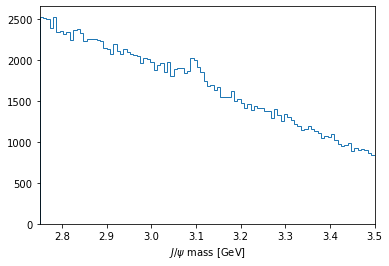

In [6]:
def plot_mass(df):
    counts, bins, _ = plt.hist(df['Jpsi_M'], bins=100, range=[2.75, 3.5], histtype='step')
    # You can also use LaTeX in the axis label
    plt.xlabel('$J/\\psi$ mass [GeV]')
    plt.xlim(bins[0], bins[-1])

plot_mass(data_df)

### Adding variables

In [7]:
# When making the ROOT file we forgot to add some variables, no bother lets add them now!
data_df.eval('Jpsi_eta = arctanh(Jpsi_PZ/Jpsi_P)', inplace=True)
data_df.head()['Jpsi_eta']

entry
0    3.703371
1    2.874790
2    3.307233
3    3.972345
4    3.307082
Name: Jpsi_eta, dtype: float64

**Exercise:** Add `mu_P` and `mum_P` columns to the DataFrame.

In [8]:
data_df.eval('mup_P = sqrt(mup_PX**2 + mup_PY**2 + mup_PZ**2)', inplace=True)
data_df.eval('mum_P = sqrt(mum_PX**2 + mum_PY**2 + mum_PZ**2)', inplace=True)
# We can also get multiple columns at the same time
data_df.head()[['mum_P', 'mup_P']]

mum_P      mup_P
entry                      
0      88.809553  99.820509
1      10.484875  41.900145
2      31.577624  20.490405
3      69.311033   9.087997
4      66.868844  17.031472

## 7. Using rectangular cuts

* We want to increase the 'signal significance' of our sample - this means more signal events with respect to background
* To do this we can cut on certain discriminating variables
* Here we will make cuts on the `Jpsi_PT` and **PID** (Particle Identification) variables

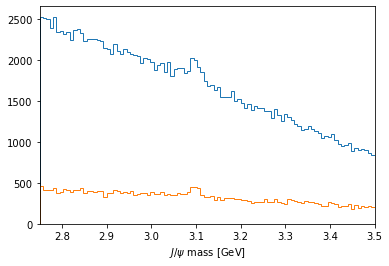

In [9]:
plot_mass(data_df)
data_with_cuts_df = data_df.query('Jpsi_PT > 4')
plot_mass(data_with_cuts_df)

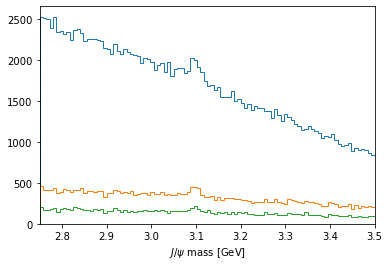

In [10]:
plot_mass(data_df)
data_with_cuts_df = data_df.query('Jpsi_PT > 4')
plot_mass(data_with_cuts_df)
# Lets add some PID cuts as well
data_with_cuts_df = data_df.query('(Jpsi_PT > 4) & ((mum_ProbNNmu > 0.9) & (mup_ProbNNmu > 0.9))')
plot_mass(data_with_cuts_df)

Let's go back and add a label argument to our plot function. This makes it easier to identify each line.
We can also use the `density` argument in `matplotlib.hist` to plot all the histograms as the same scale.

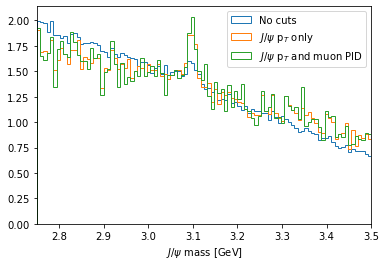

In [11]:
def plot_mass(df, **kwargs):
    counts, bins, _ = plt.hist(df['Jpsi_M'], bins=100, range=[2.75, 3.5], histtype='step', **kwargs)
    plt.xlabel('$J/\\psi$ mass [GeV]')
    plt.xlim(bins[0], bins[-1])

plot_mass(data_df, label='No cuts', density=1)
data_with_cuts_df = data_df.query('Jpsi_PT > 4')
plot_mass(data_with_cuts_df, label='$J/\\psi$ p$_T$ only', density=1)
data_with_cuts_df = data_df.query('(Jpsi_PT > 4) & ((mum_ProbNNmu > 0.9) & (mup_ProbNNmu > 0.9))')
plot_mass(data_with_cuts_df, label='$J/\\psi$ p$_T$ and muon PID', density=1)
plt.legend(loc='best')

For this tutorial we have a special function for testing the significance of the signal in our dataset. There are many different ways to do this with real data, though we will not cover them here.

In [12]:
# TODO: Work out what check_truth function is.
data_df.columns

Index(['Jpsi_PE', 'Jpsi_PX', 'Jpsi_PY', 'Jpsi_PZ', 'Jpsi_PT', 'Jpsi_P',
       'Jpsi_M', 'mum_PT', 'mum_PX', 'mum_PY', 'mum_PZ', 'mum_IP', 'mum_eta',
       'mum_M', 'mum_PE', 'mup_PT', 'mup_PX', 'mup_PY', 'mup_PZ', 'mup_IP',
       'mup_eta', 'mup_M', 'mup_PE', 'nTracks', 'mum_ProbNNmu', 'mum_ProbNNpi',
       'mup_ProbNNmu', 'mup_ProbNNpi', 'Jpsi_eta', 'mup_P', 'mum_P'],
      dtype='object')

In [13]:
print('Originally the significance is')
#check_truth(data_df)

print('\nCutting on pT gives us')
#check_truth(data_df.query('Jpsi_PT > 4'))

print('\nCutting on pT and ProbNNmu gives us')
#check_truth(data_df.query('(Jpsi_PT > 4) & ((mum_ProbNNmu > 0.9) & (mup_ProbNNmu > 0.9))'))

Originally the significance is

Cutting on pT gives us

Cutting on pT and ProbNNmu gives us


###  Comparing distributions

Before we just used the cuts that were told to you but how do we pick them?

One way is to get a sample of simulated data, we have a file in `data/simulated_data.root`.

**Exercise:** Load it into a pandas `DataFrame` called `mc_df`. Don't forget to add the `Jpsi_eta`, `mup_P` and `mum_P` columns!

In [14]:
#mc_df = uproot.open('/eos/user/l/lhcbsk/advanced-python/data/simulated_data.root')['DecayTree'].pandas.df()
mc_df = uproot.open('simulated_data.root')['DecayTree'].pandas.df()
mc_df.eval('Jpsi_eta = arctanh(Jpsi_PZ/Jpsi_P)', inplace=True)
mc_df.eval('mup_P = sqrt(mum_PX**2 + mum_PY**2 + mum_PZ**2)', inplace=True)
mc_df.eval('mum_P = sqrt(mum_PX**2 + mum_PY**2 + mum_PZ**2)', inplace=True)

**QUESTION:** What can we to get a background sample?

Sidebands, we know the peak is only present in $3.0~\text{GeV} < M(J/\psi) < 3.2~\text{GeV}$. If we select events outside the region we know it's a pure background sample.

**Exercise:** Make a new `DataFrame` called `bkg_df` containing only events outside $3.0~\text{GeV} < M(J/\psi) < 3.2~\text{GeV}$.

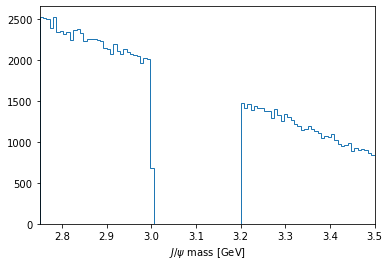

In [15]:
bkg_df = data_df.query('~(3.0 < Jpsi_M < 3.2)')
plot_mass(bkg_df)

**QUESTION:** Why is there a step at 3 GeV on this plot?

It's a binning effect, we've appled a cut at 3.0 GeV but the nearest bin is $[2.9975, 3.005]$ so it is only partially filled.

Now let's plot the variables in MC and background to see what they look like?

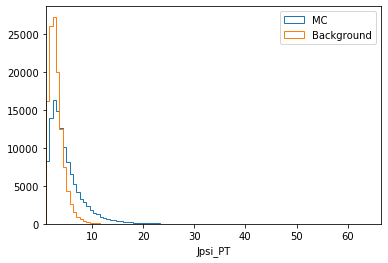

In [16]:
var = 'Jpsi_PT'
_, bins, _ = plt.hist(mc_df[var], bins=100, histtype='step', label='MC')
_, bins, _ = plt.hist(bkg_df[var], bins=bins, histtype='step', label='Background')
plt.xlabel(var)
plt.xlim(bins[0], bins[-1])
plt.legend(loc='best')

In [17]:
# Those are hard to compare!!!
# We should add the density keyword argument to normalise the distributions
var = 'Jpsi_PT'
_, bins, _ = plt.hist(mc_df[var], bins=100, histtype='step', label='MC', density=1)
_, bins, _ = plt.hist(bkg_df[var], bins=bins, histtype='step', label='Background', density=1)
plt.xlabel(var)
plt.xlim(bins[0], bins[-1])
plt.legend(loc='best')

**Exercise:** Make a function which plots both variables with the signature `plot_comparision(var, mc_df, bkg_df)`.

In [18]:
def plot_comparision(var, mc_df, bkg_df):
    _, bins, _ = plt.hist(mc_df[var], bins=100, histtype='step', label='MC', density=1)
    _, bins, _ = plt.hist(bkg_df[var], bins=bins, histtype='step', label='Background', density=1)
    plt.xlabel(var)
    plt.xlim(bins[0], bins[-1])
    plt.legend(loc='best')

We can now use this function to plot all of the variables available in the data using `data_df.columns`:

/Users/marthahilton/miniconda3/envs/my-analysis-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


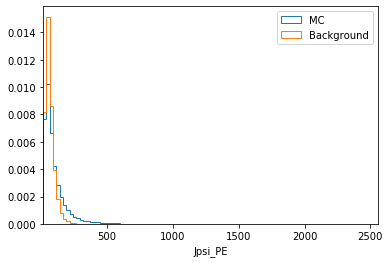

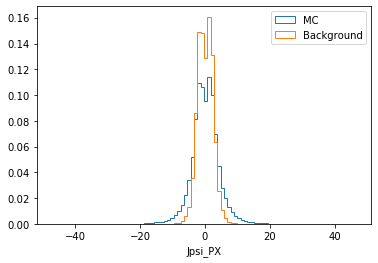

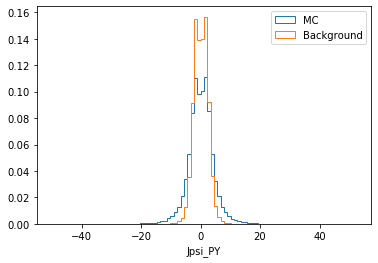

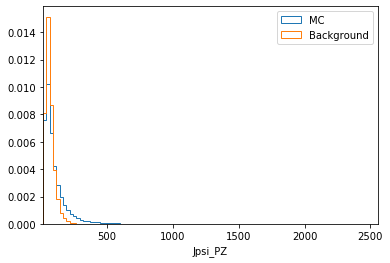

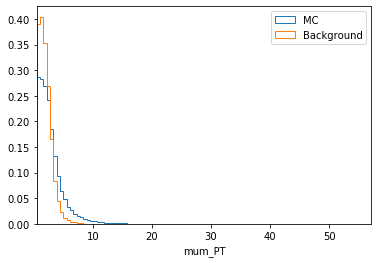

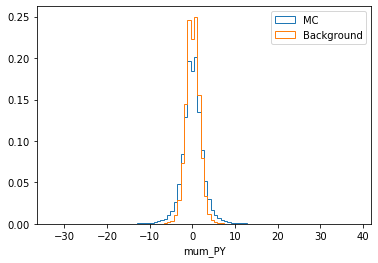

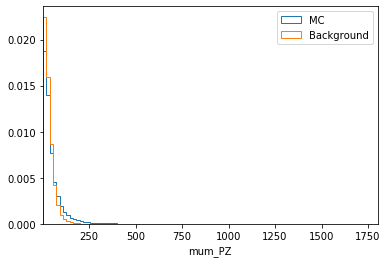

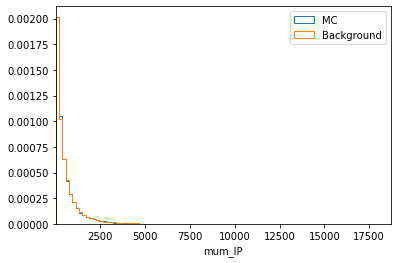

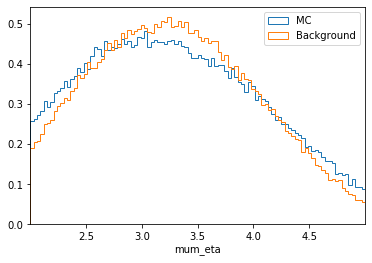

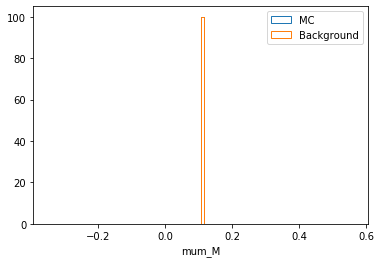

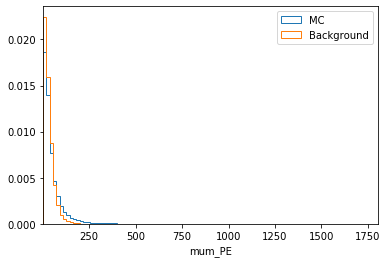

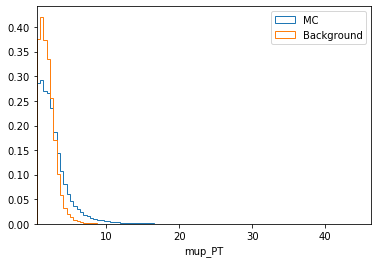

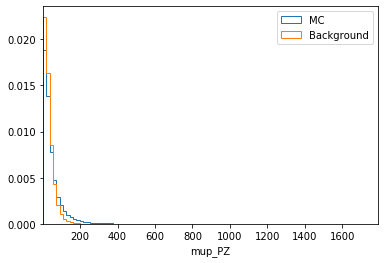

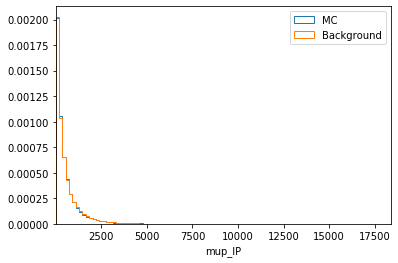

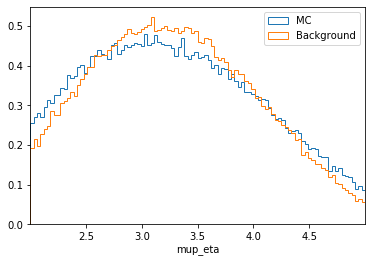

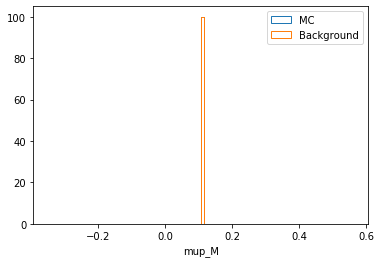

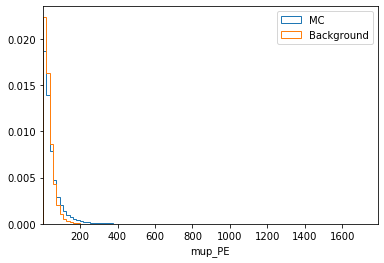

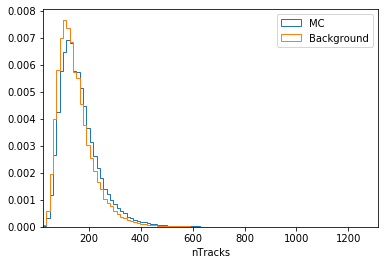

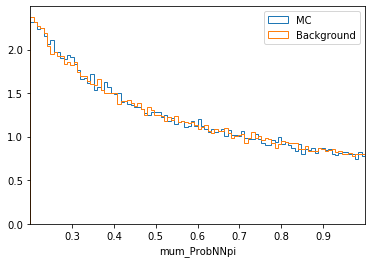

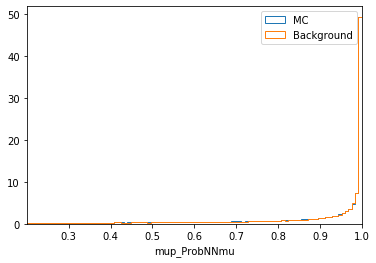

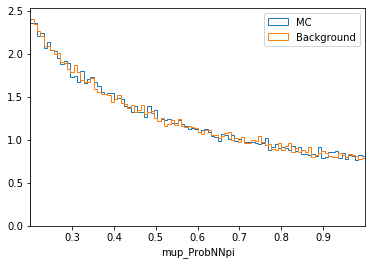

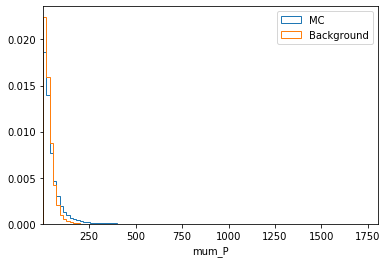

In [19]:
for var in data_df.columns:
    plt.figure()
    plot_comparision(var, mc_df, bkg_df)

Things to note:

 - This doesn't work for the $J/\psi$ mass variable: We can only rely on this method if the variable is independent of mass. Fortunately we often want to do this as if a variable is heavily dependent on mass it can shape our distributions and can make it hard to know what is signal and what is background.
 - Muon mass is a fixed value for all muons: In this sample we have assumed the PDG value of the muon mass to allow us to calculate the energy component using only the information from the tracking detectors. This is often more precise than using calorimeters to measure $P_E$.
 - We got a warning about `More than 20 figures have been opened.`: Opening plots uses memory so if you open too many at the same time your scripts can be become slow or even crash. In this case we can ignore it as we only produce 30 plots but be careful if you ever make thousands of plots.
 - Pseudorapidity (eta) only goes between about 1 and 6: This dataset is supposed to look like vaugely like LHCb data where the detector only covers that region.

**Exercise:** Look at the variables above and try to get a clean $J/\psi$ mass peak and use the significance function to see how well you do.

**Aside:** We will want to use some of the variables and dataframes in the next lesson. In order to do this we will *store* them in this session and reload them in the next lesson.

In [20]:
%store bkg_df
%store mc_df
%store data_df

Stored 'bkg_df' (DataFrame)
Stored 'mc_df' (DataFrame)
Stored 'data_df' (DataFrame)
